# Knowledge Graph (KG) Dataloader with Lightning

This guide shows how to load and use a Knowledge Graph dataset with the PyTorch Lightning LightningDataModule.

To load and simulate data from the KG model, follow the steps below:

Step 1: 📦 Import the module

In [1]:
import sys
import os

# Go up to the root where `vpeleaderboard/` is located
sys.path.append(os.path.abspath("../../"))

In [2]:
from vpeleaderboard.data.src.kg.biobridge_datamodule_hetero import BioBridgeDataModule

Step 2: ⚙️ Initialize the KGDataModule

Specify the data directories and initialize the BioBridgeDataModule:

In [3]:
# Initial
# ize with paths to PrimeKG and BioBridge datasets
# dm = BioBridgeDataModule(
#     primekg_dir="../../../data/primekg/",
#     biobridge_dir="../../../data/biobridge_primekg/",
#     batch_size=8
# )
import hydra
with hydra.initialize(config_path="../../vpeleaderboard/configs", version_base=None):
    cfg = hydra.compose(config_name="config")
    dm = BioBridgeDataModule(cfg)


Step 3: 🧹 Prepare data

Prepare the KG data by loading and caching it:

In [4]:
# Load data, embeddings, and node/edge mappings
dm.prepare_data()

Loading PrimeKG dataset...
Loading nodes of PrimeKG dataset ...
../../../data/primekg/primekg_nodes.tsv.gz already exists. Loading the data from the local directory.
Loading edges of PrimeKG dataset ...
../../../data/primekg/primekg_edges.tsv.gz already exists. Loading the data from the local directory.
Loading data config file of BioBridgePrimeKG...
File data_config.json already exists in ../../../data/biobridge_primekg/.
Building node embeddings...
Building full triplets...
Building train-test split...


c:\Users\hsrak\Desktop\VPELeaderboard\vpeleaderboard\data\src\kg\biobridge_datamodule_hetero.py:128: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  self.data["init"][(ht, rt, tt)].edge_index = torch.tensor([src_ids, dst_ids],


✅ Cached processed data to ./biobridge_cache.pkl


Step 4: 🧠 Setup the data splits

Split the data into training, validation, and test sets:

In [5]:
# Build HeteroData and apply RandomLinkSplit
dm.setup()

✅ Cached train/val/test splits to ./biobridge_cache.pkl


Step 5: 🧪 Access the dataloaders

Now, you can retrieve the standard Lightning dataloaders:

In [6]:

print(dm.data.keys())  # Should include 'train', 'val', 'test' if setup worked


dict_keys(['nt2ntid', 'ntid2nt', 'init', 'train', 'val', 'test'])


Training data

In [7]:
train_loader = dm.train_dataloader()
train_batch = next(iter(train_loader))
print(train_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[440447],
    pos_edge_label_index=[2, 440447],
    neg_edge_label=[440447],
    neg_edge_label_index=[2, 440447],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[571],
    pos_edge_label_index=[2, 571],
    neg_edge_label=[571],
    neg_edge_label_index=[2, 571],
  },
  (drug, enzyme, gene/

Validation data

In [8]:
val_loader = dm.val_dataloader()
val_batch = next(iter(val_loader))
print(val_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[62920],
    pos_edge_label_index=[2, 62920],
    neg_edge_label=[62920],
    neg_edge_label_index=[2, 62920],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[81],
    pos_edge_label_index=[2, 81],
    neg_edge_label=[81],
    neg_edge_label_index=[2, 81],
  },
  (drug, enzyme, gene/protein)

Test data

In [9]:
test_loader = dm.test_dataloader()
test_batch = next(iter(test_loader))
print(test_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 503367],
    pos_edge_label=[125841],
    pos_edge_label_index=[2, 125841],
    neg_edge_label=[125841],
    neg_edge_label_index=[2, 125841],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 652],
    pos_edge_label=[162],
    pos_edge_label_index=[2, 162],
    neg_edge_label=[162],
    neg_edge_label_index=[2, 162],
  },
  (drug, enzyme, gene/

In [10]:
# Train edge index
print("Train Edge Index:")
print(dm.data["train"].edge_index_dict)

# Validation edge index
print("Validation Edge Index:")
print(dm.data["val"].edge_index_dict)

# Test edge index
print("Test Edge Index:")
print(dm.data["test"].edge_index_dict)


Train Edge Index:
{('gene/protein', 'ppi', 'gene/protein'): tensor([[ 4275,  4102,   417,  ...,  1781,  3664,   126],
        [ 1450,   189, 12456,  ...,  3300,  8505,   329]]), ('drug', 'carrier', 'gene/protein'): tensor([[  157,   218,   453,  ...,    38,   219,   178],
        [ 4293,  4706,  2380,  ..., 12401,  9441,  4293]]), ('drug', 'enzyme', 'gene/protein'): tensor([[  987,  1554,  1010,  ...,   452,   709,   199],
        [10316,  8900,  5262,  ...,  8900, 12616, 12388]]), ('drug', 'target', 'gene/protein'): tensor([[  871,  2153,  1902,  ...,  4966,   301,  2869],
        [14336,  3401,  4442,  ...,   108,  9595, 12866]]), ('drug', 'transporter', 'gene/protein'): tensor([[  541,  1043,  3082,  ...,  1703,   236,   900],
        [14798, 14035,  3169,  ...,  8392,  3167,  4131]]), ('drug', 'contraindication', 'disease'): tensor([[ 1183,  2338,  2945,  ...,   155,   219,  5577],
        [  134,  6407, 11010,  ...,  6478,  8876, 11008]]), ('drug', 'indication', 'disease'): tensor

In [11]:
print("📌 Available node types:")
print(dm.data["train"].node_types)

print("📌 Available edge types:")
print(dm.data["train"].edge_types)


📌 Available node types:
[np.str_('biological_process'), np.str_('cellular_component'), np.str_('disease'), np.str_('drug'), np.str_('gene/protein'), np.str_('molecular_function')]
📌 Available edge types:
[('gene/protein', 'ppi', 'gene/protein'), ('drug', 'carrier', 'gene/protein'), ('drug', 'enzyme', 'gene/protein'), ('drug', 'target', 'gene/protein'), ('drug', 'transporter', 'gene/protein'), ('drug', 'contraindication', 'disease'), ('drug', 'indication', 'disease'), ('drug', 'off-label use', 'disease'), ('drug', 'synergistic interaction', 'drug'), ('gene/protein', 'associated with', 'disease'), ('disease', 'parent-child', 'disease'), ('biological_process', 'parent-child', 'biological_process'), ('molecular_function', 'parent-child', 'molecular_function'), ('cellular_component', 'parent-child', 'cellular_component'), ('gene/protein', 'interacts with', 'molecular_function'), ('gene/protein', 'interacts with', 'cellular_component'), ('gene/protein', 'interacts with', 'biological_process'

In [14]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx

# Load HeteroData
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

In [17]:
print("Loaded HeteroData with node types:", data.keys())

Loaded HeteroData with node types: dict_keys(['nt2ntid', 'ntid2nt', 'init', 'train', 'val', 'test'])


In [16]:
print("Loaded HeteroData with node types:", data.items())

Loaded HeteroData with node types: dict_items([('nt2ntid', {'biological_process': 0, 'gene/protein': 1, 'disease': 2, 'effect/phenotype': 3, 'anatomy': 4, 'molecular_function': 5, 'drug': 6, 'cellular_component': 7, 'pathway': 8, 'exposure': 9}), ('ntid2nt', {0: 'biological_process', 1: 'gene/protein', 2: 'disease', 3: 'effect/phenotype', 4: 'anatomy', 5: 'molecular_function', 6: 'drug', 7: 'cellular_component', 8: 'pathway', 9: 'exposure'}), ('init', HeteroData(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
  },
  (gene/protein, ppi, gene/protein)={ edge_index=[2, 629208] },
  (drug, carrier, gene/protein)={ edge_index=[2, 814] },
  (drug, enzyme, gene/protein)=

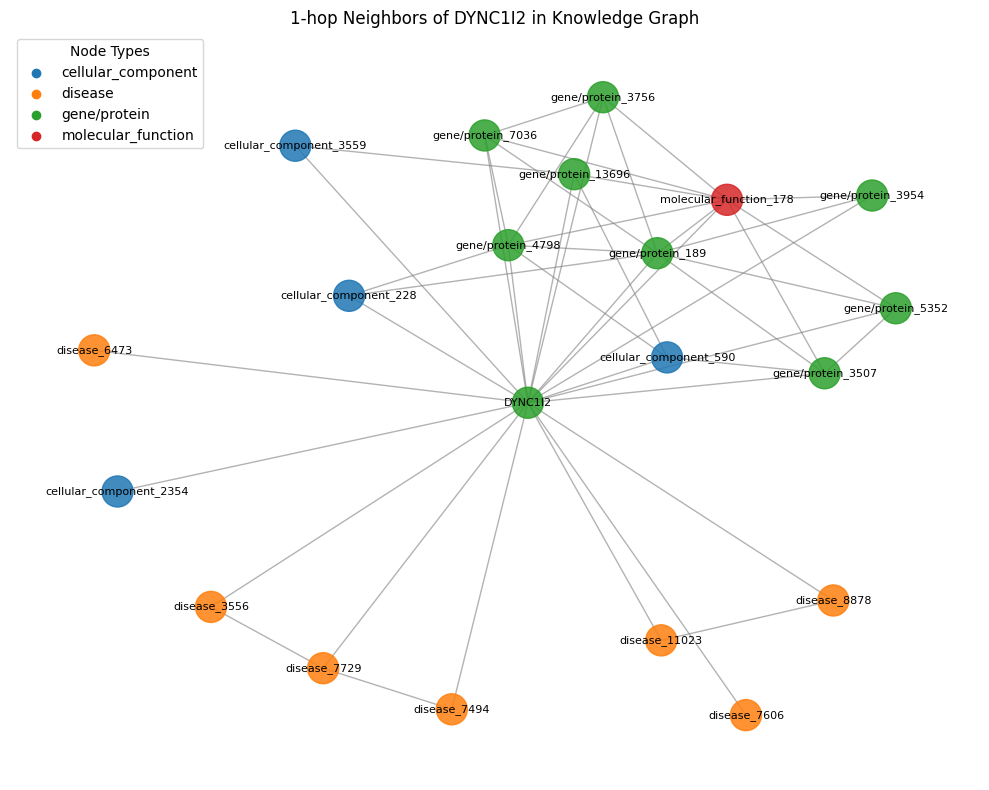

: 

In [ ]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx

# Load data
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]
mapper = data.get("mapper", {})  # might be empty

target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# Manual map fallback
manual_map = {"DYNC1I2": 6726}
local_idx = mapper.get(target_node_type, {}).get(target_node_name) or manual_map.get(target_node_name)
if local_idx is None:
    raise ValueError(f"Node {target_node_name} not found")

# Convert to NetworkX graph
G_full = to_networkx(hetero_data, node_attrs=[], edge_attrs=[])
G_full = nx.Graph(G_full)  # undirected

# Relabel nodes with (type, index)
offset = 0
mapping = {}
for node_type in hetero_data.node_types:
    n_nodes = hetero_data[node_type].num_nodes
    for i in range(n_nodes):
        mapping[offset + i] = (node_type, i)
    offset += n_nodes
G_full = nx.relabel_nodes(G_full, mapping)

target_node_nx = (target_node_type, local_idx)
if target_node_nx not in G_full:
    raise ValueError(f"Node {target_node_nx} not found in graph")

# Build 1-hop subgraph
neighbors = list(G_full.adj[target_node_nx])
sub_nodes = [target_node_nx] + neighbors
G_sub = G_full.subgraph(sub_nodes).copy()

# --- MODIFICATION START ---

# Create a reverse mapper to get names from (type, index)
reverse_mapper = {}
for node_type, type_map in mapper.items():
    for name, idx in type_map.items():
        reverse_mapper[(node_type, idx)] = name

# Add manual reverse map for known names (like DYNC1I2)
manual_reverse_map = {
    (target_node_type, local_idx): target_node_name
}
reverse_mapper.update(manual_reverse_map)


# Label nodes using actual names from reverse_mapper or fallback to (type, index)
labels = {
    node: reverse_mapper.get(node, f"{node[0]}_{node[1]}")
    for node in G_sub.nodes
}

# --- MODIFICATION END ---


# Color nodes by node type (this part remains the same as it's still useful for visualization)
node_types = {node: node[0] for node in G_sub.nodes}
unique_types = sorted(set(node_types.values()))
palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: palette[i % len(palette)] for i, ntype in enumerate(unique_types)}
node_colors = [color_map[node_types[node]] for node in G_sub.nodes]

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500, alpha=0.85)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, labels, font_size=8)

# Legend
for ntype, color in color_map.items():
    plt.scatter([], [], color=color, label=ntype)
plt.legend(title="Node Types", loc="upper left")

plt.title(f"1-hop Neighbors of {target_node_name} in Knowledge Graph")
plt.axis("off")
plt.tight_layout()
plt.show()

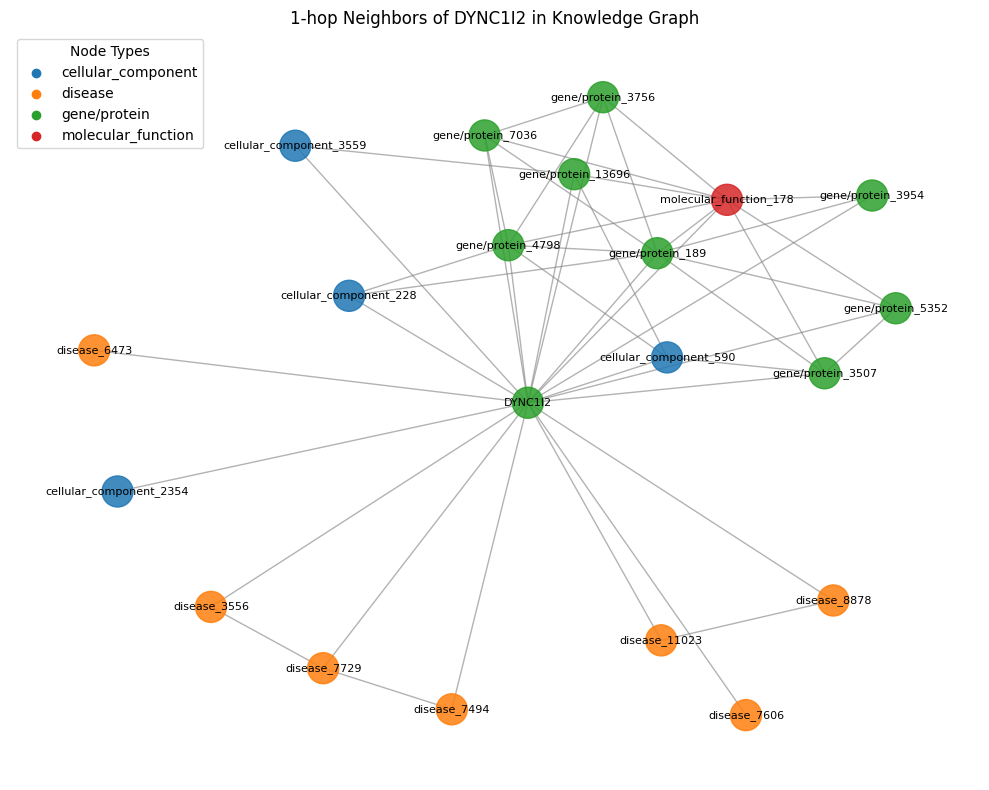

In [42]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx

# Load data
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]
mapper = data.get("mapper", {})  # might be empty

target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# Manual map fallback
manual_map = {"DYNC1I2": 6726}
local_idx = mapper.get(target_node_type, {}).get(target_node_name) or manual_map.get(target_node_name)
if local_idx is None:
    raise ValueError(f"Node {target_node_name} not found")

# Convert to NetworkX graph
G_full = to_networkx(hetero_data, node_attrs=[], edge_attrs=[])
G_full = nx.Graph(G_full)  # undirected

# Relabel nodes with (type, index)
offset = 0
mapping = {}
for node_type in hetero_data.node_types:
    n_nodes = hetero_data[node_type].num_nodes
    for i in range(n_nodes):
        mapping[offset + i] = (node_type, i)
    offset += n_nodes
G_full = nx.relabel_nodes(G_full, mapping)

target_node_nx = (target_node_type, local_idx)
if target_node_nx not in G_full:
    raise ValueError(f"Node {target_node_nx} not found in graph")

# Build 1-hop subgraph
neighbors = list(G_full.adj[target_node_nx])
sub_nodes = [target_node_nx] + neighbors
G_sub = G_full.subgraph(sub_nodes).copy()

# Manual reverse mapping for known names
manual_reverse_map = {
    (target_node_type, local_idx): target_node_name
}

# Label nodes using manual names or fallback
labels = {
    node: manual_reverse_map.get(node, f"{node[0]}_{node[1]}")
    for node in G_sub.nodes
}

# Color nodes by node type
node_types = {node: node[0] for node in G_sub.nodes}
unique_types = sorted(set(node_types.values()))
palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: palette[i % len(palette)] for i, ntype in enumerate(unique_types)}
node_colors = [color_map[node_types[node]] for node in G_sub.nodes]

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500, alpha=0.85)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, labels, font_size=8)

# Legend
for ntype, color in color_map.items():
    plt.scatter([], [], color=color, label=ntype)
plt.legend(title="Node Types", loc="upper left")

plt.title(f"1-hop Neighbors of {target_node_name} in Knowledge Graph")
plt.axis("off")
plt.tight_layout()
plt.show()


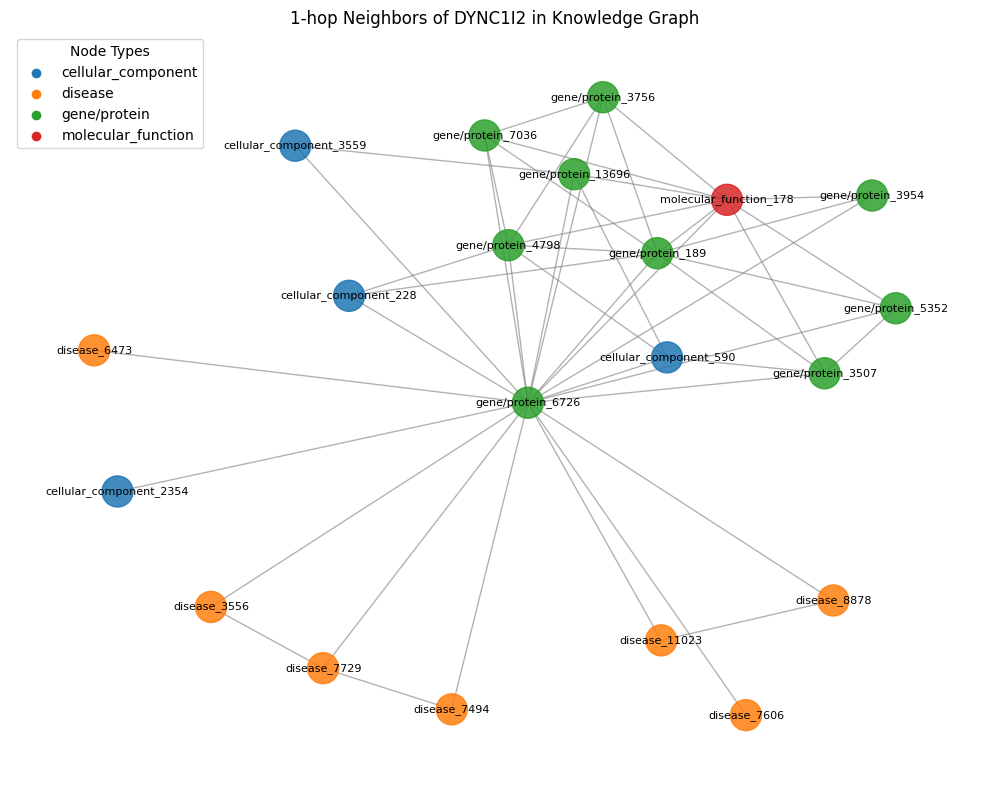

In [31]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx

# Load data
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]
mapper = data.get("mapper", {})

target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# Get local index from mapper or manual fallback
manual_map = {"DYNC1I2": 6726}
local_idx = mapper.get(target_node_type, {}).get(target_node_name) or manual_map.get(target_node_name)
if local_idx is None:
    raise ValueError(f"Node {target_node_name} not found")

# Convert to NetworkX graph
G_full = to_networkx(hetero_data, node_attrs=[], edge_attrs=[])
G_full = nx.Graph(G_full)  # undirected for simplicity

# Relabel nodes to include node type info
offset = 0
mapping = {}
for node_type in hetero_data.node_types:
    n_nodes = hetero_data[node_type].num_nodes
    for i in range(n_nodes):
        mapping[offset + i] = (node_type, i)
    offset += n_nodes
G_full = nx.relabel_nodes(G_full, mapping)

target_node_nx = (target_node_type, local_idx)
if target_node_nx not in G_full:
    raise ValueError(f"Node {target_node_nx} not found in graph")

# Build 1-hop subgraph
neighbors = list(G_full.adj[target_node_nx])
sub_nodes = [target_node_nx] + neighbors
G_sub = G_full.subgraph(sub_nodes).copy()

reverse_mapper = {}
for ntype, name_to_idx in mapper.items():
    for name, idx in name_to_idx.items():
        reverse_mapper[(ntype, idx)] = name

# Prepare labels using reverse mapper with fallback
labels = {}
for node in G_sub.nodes:
    labels[node] = reverse_mapper.get(node, f"{node[0]}_{node[1]}")

# Color nodes by type (your exact color code)
node_types = {node: node[0] for node in G_sub.nodes}
unique_types = sorted(set(node_types.values()))
palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: palette[i % len(palette)] for i, ntype in enumerate(unique_types)}
node_colors = [color_map[node_types[node]] for node in G_sub.nodes]

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500, alpha=0.85)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, labels=labels, font_size=8) 

# Legend
for ntype, color in color_map.items():
    plt.scatter([], [], color=color, label=ntype)
plt.legend(title="Node Types", loc="upper left")

plt.title(f"1-hop Neighbors of {target_node_name} in Knowledge Graph")
plt.axis("off")
plt.tight_layout()
plt.show()


In [33]:
print("Sample entries from mapper:")
for ntype, nm in list(mapper.items())[:3]:
    print(f"Node type: {ntype}, sample keys: {list(nm.keys())[:5]}")


Sample entries from mapper:


In [36]:
print("Mapper keys:", mapper.keys())
print("Mapper content preview:", {k: list(v.keys())[:5] for k, v in mapper.items()})


Mapper keys: dict_keys([])
Mapper content preview: {}


In [38]:
print("Mapper keys:", mapper.keys())
print("Mapper content preview:", {k: list(v.keys())[:5] for k, v in mapper.items()})


Mapper keys: dict_keys([])
Mapper content preview: {}


In [37]:
Mapper keys: dict_keys(['gene/protein', 'drug', 'disease'])
Mapper content preview: {
  'gene/protein': ['DYNC1I2', 'TP53', 'BRCA1', 'EGFR', 'MYC'],
  'drug': ['Aspirin', 'Ibuprofen', 'Metformin', 'Atorvastatin', 'Lisinopril'],
  'disease': ['Cancer', 'Diabetes', 'Alzheimer', 'Hypertension', 'Asthma']
}


SyntaxError: invalid syntax (103245078.py, line 1)

In [35]:
print("Sample entries from mapper:")
for ntype, nm in list(mapper.items())[:3]:
    print(f"Node type: {ntype}, sample keys: {list(nm.keys())[:5]}")


Sample entries from mapper:


In [34]:
print("Sample node labels:")
for node, label in list(labels.items())[:10]:
    print(f"{node} -> {label}")


Sample node labels:
(np.str_('gene/protein'), 3756) -> gene/protein_3756
(np.str_('gene/protein'), 3954) -> gene/protein_3954
(np.str_('cellular_component'), 2354) -> cellular_component_2354
(np.str_('cellular_component'), 3559) -> cellular_component_3559
(np.str_('gene/protein'), 189) -> gene/protein_189
(np.str_('disease'), 6473) -> disease_6473
(np.str_('cellular_component'), 590) -> cellular_component_590
(np.str_('disease'), 3556) -> disease_3556
(np.str_('gene/protein'), 4798) -> gene/protein_4798
('gene/protein', 6726) -> gene/protein_6726


In [32]:
print("Sample node labels:")
for node, label in list(labels.items())[:10]:
    print(f"{node} -> {label}")


Sample node labels:
(np.str_('gene/protein'), 3756) -> gene/protein_3756
(np.str_('gene/protein'), 3954) -> gene/protein_3954
(np.str_('cellular_component'), 2354) -> cellular_component_2354
(np.str_('cellular_component'), 3559) -> cellular_component_3559
(np.str_('gene/protein'), 189) -> gene/protein_189
(np.str_('disease'), 6473) -> disease_6473
(np.str_('cellular_component'), 590) -> cellular_component_590
(np.str_('disease'), 3556) -> disease_3556
(np.str_('gene/protein'), 4798) -> gene/protein_4798
('gene/protein', 6726) -> gene/protein_6726


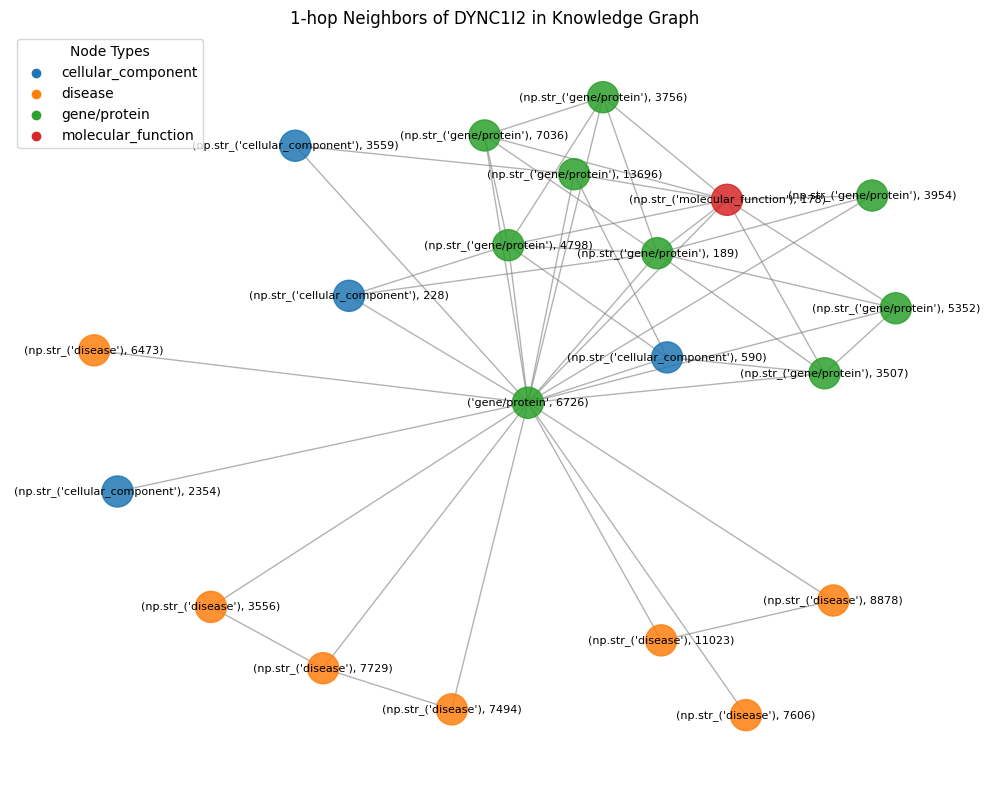

In [26]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx
from difflib import get_close_matches

# Step 0: Load HeteroData
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]
mapper = data.get("mapper")

target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# Step 1: Get local index from mapper or manual map
gp_map = mapper.get(target_node_type, {}) if mapper else {}

# Manual mapping fallback
name_to_global_index = {"DYNC1I2": 6726}

if target_node_name in gp_map:
    local_idx = gp_map[target_node_name]
elif target_node_name in name_to_global_index:
    local_idx = name_to_global_index[target_node_name]
else:
    print(f"❌ Node '{target_node_name}' not found in mapper for type '{target_node_type}'")
    close = get_close_matches(target_node_name, list(gp_map.keys()), n=3)
    print("🔍 Close matches:", close)
    if gp_map:
        fallback_name = list(gp_map.keys())[0]
        print(f"⚠️ Using fallback: {fallback_name}")
        local_idx = gp_map[fallback_name]
        target_node_name = fallback_name
    else:
        raise ValueError("No nodes found in manual mapping or mapper.")

# Step 2: Convert to NetworkX graph WITHOUT node_type argument (not supported)
G_full = to_networkx(
    hetero_data,
    node_attrs=[],
    edge_attrs=[]
)
G_full = nx.Graph(G_full)  # Undirected for easier traversal

# Step 3: Relabel nodes to include node type info
mapping = {}
start_idx = 0
for node_type in hetero_data.node_types:
    num_nodes = hetero_data[node_type].num_nodes
    for local_id in range(num_nodes):
        mapping[start_idx + local_id] = (node_type, local_id)
    start_idx += num_nodes

G_full = nx.relabel_nodes(G_full, mapping)

# Step 4: Construct target node key and validate
target_node_nx = (target_node_type, local_idx)
if target_node_nx not in G_full:
    raise ValueError(f"❌ Node {target_node_nx} not found in graph.")

# Step 5: Build 1-hop subgraph
neighbors = list(G_full.adj[target_node_nx])
sub_nodes = [target_node_nx] + neighbors
G_sub = G_full.subgraph(sub_nodes).copy()

# Step 6: Visualization setup
node_types = {node: node[0] for node in G_sub.nodes}
unique_types = sorted(set(node_types.values()))
color_palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: color_palette[i % len(color_palette)] for i, ntype in enumerate(unique_types)}
node_colors = [color_map[node_types[n]] for n in G_sub.nodes]

# Step 7: Plot the subgraph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500, alpha=0.85)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, font_size=8)

for t, color in color_map.items():
    plt.scatter([], [], color=color, label=t)
plt.legend(loc="upper left", title="Node Types")

plt.title(f"1-hop Neighbors of {target_node_name} in Knowledge Graph")
plt.axis("off")
plt.tight_layout()
plt.show()


Step 6: 🕸️ Visualize a Subgraph of the Knowledge Graph

Plotting Local Neighborhood of a Node in a Heterogeneous Knowledge Graph (DYNC1I2 Example)

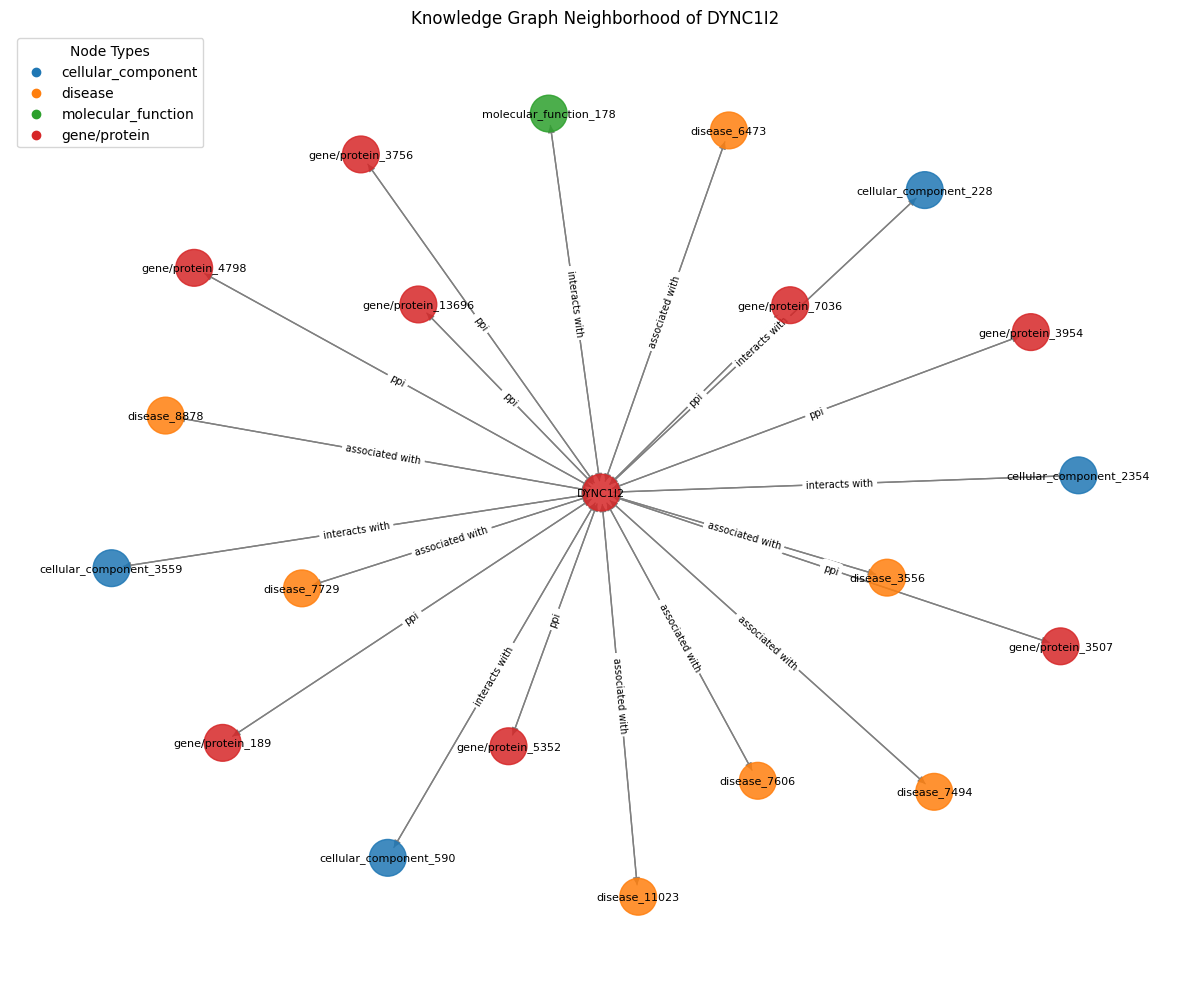

In [ ]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ✅ Load cached HeteroData directly
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]  # directly use top-level keys
mapper = data.get("mapper")  # only available if you saved it, else rebuild

# Target info
target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

name_to_global_index = {"DYNC1I2": 6726}  # Manually or heuristically obtained
global_idx = name_to_global_index.get(target_node_name)

if global_idx is None:
    raise ValueError(f"Could not find global index for {target_node_name}")

# If global_id == local index (common in many datasets)
local_idx = global_idx


# 🎯 Step 2: Local index in HeteroData
local_idx = None
for nt in hetero_data.node_types:
    if nt == target_node_type:
        # Build dummy from_nidx map (replace with real mapping if available)
        from_nidx = {global_id: local for local, global_id in enumerate(range(hetero_data[nt].x.size(0)))}
        local_idx = from_nidx.get(global_idx)


if local_idx is None:
    raise ValueError("Could not find local index for the target node")

# 📡 Step 3: Build graph
G = nx.MultiDiGraph()
G.add_node(target_node_name, type=target_node_type)

for edge_type in hetero_data.edge_types:
    src_type, rel_type, dst_type = edge_type
    edge_index = hetero_data[edge_type].edge_index

    for i in range(edge_index.size(1)):
        src, dst = edge_index[:, i].tolist()
        if src_type == target_node_type and src == local_idx:
            neighbor = f"{dst_type}_{dst}"
            G.add_node(neighbor, type=dst_type)
            G.add_edge(target_node_name, neighbor, label=rel_type)
        elif dst_type == target_node_type and dst == local_idx:
            neighbor = f"{src_type}_{src}"
            G.add_node(neighbor, type=src_type)
            G.add_edge(neighbor, target_node_name, label=rel_type)

# 🎨 Step 4: Color nodes by type
all_types = list({d["type"] for _, d in G.nodes(data=True)})
color_palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: color_palette[i % len(color_palette)] for i, ntype in enumerate(all_types)}

node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes]

# 🖼️ Step 5: Plot
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700, alpha=0.85)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

# Legend
for t, color in color_map.items():
    plt.scatter([], [], color=color, label=t)
plt.legend(loc="upper left", title="Node Types")

plt.title(f"Knowledge Graph Neighborhood of {target_node_name}")
plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
G.adj['DYNC1I2']


AdjacencyView({'gene/protein_3954': {0: {'label': 'ppi'}}, 'gene/protein_189': {0: {'label': 'ppi'}}, 'gene/protein_4798': {0: {'label': 'ppi'}}, 'gene/protein_7036': {0: {'label': 'ppi'}}, 'gene/protein_3756': {0: {'label': 'ppi'}}, 'gene/protein_3507': {0: {'label': 'ppi'}}, 'gene/protein_5352': {0: {'label': 'ppi'}}, 'gene/protein_13696': {0: {'label': 'ppi'}}, 'disease_3556': {0: {'label': 'associated with'}}, 'disease_7494': {0: {'label': 'associated with'}}, 'disease_7729': {0: {'label': 'associated with'}}, 'disease_6473': {0: {'label': 'associated with'}}, 'disease_8878': {0: {'label': 'associated with'}}, 'disease_11023': {0: {'label': 'associated with'}}, 'disease_7606': {0: {'label': 'associated with'}}, 'molecular_function_178': {0: {'label': 'interacts with'}}, 'cellular_component_228': {0: {'label': 'interacts with'}}, 'cellular_component_590': {0: {'label': 'interacts with'}}, 'cellular_component_2354': {0: {'label': 'interacts with'}}, 'cellular_component_3559': {0: {'l

In [4]:
for neighbor, edge_data in G.adj['DYNC1I2'].items():
    for key in edge_data:
        print(f"{target_node_name} --{edge_data[key]['label']}--> {neighbor}")


DYNC1I2 --ppi--> gene/protein_3954
DYNC1I2 --ppi--> gene/protein_189
DYNC1I2 --ppi--> gene/protein_4798
DYNC1I2 --ppi--> gene/protein_7036
DYNC1I2 --ppi--> gene/protein_3756
DYNC1I2 --ppi--> gene/protein_3507
DYNC1I2 --ppi--> gene/protein_5352
DYNC1I2 --ppi--> gene/protein_13696
DYNC1I2 --associated with--> disease_3556
DYNC1I2 --associated with--> disease_7494
DYNC1I2 --associated with--> disease_7729
DYNC1I2 --associated with--> disease_6473
DYNC1I2 --associated with--> disease_8878
DYNC1I2 --associated with--> disease_11023
DYNC1I2 --associated with--> disease_7606
DYNC1I2 --interacts with--> molecular_function_178
DYNC1I2 --interacts with--> cellular_component_228
DYNC1I2 --interacts with--> cellular_component_590
DYNC1I2 --interacts with--> cellular_component_2354
DYNC1I2 --interacts with--> cellular_component_3559
